Bad Pixel Testing Notebook

In [1]:
import numpy as np
import sys
sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")
import FliSdk_V2 as sdk
import derpy
from matplotlib import pyplot as plt


<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Brewster\AppData\Local\Temp\ipykernel_22400\2469720873.py:3: SyntaxWarning: invalid escape sequence '\P'
  sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")


In [13]:
cam.close()

In [2]:
cam = derpy.CRED2(set_temperature = -40, fps = 100, tint = 0.1, temp_tolerance = 0.5, conversion_gain = 'high')

AssertionError: Error while setting camera

Once camera is connected, try taking frames 

In [12]:
#set camera parameters
cam.tint = 15
cam.fps  = 100
cam.conversion_gain = 'low'

# taking a handful of dark frames and showing the average image
n_frames = 1
drk_test = cam.take_median_image(n_frames)

# plotting
plt.figure(0)
plt.imshow(drk_test, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('1 ms Dark')

AssertionError: tint value 15ms must be between 0.001043 and 9.996761

If we are taking frames, we can start testing whether we can control the bad pixel mode for the camera

In [24]:
sdk.FliCredTwo.EnableBadPixel(cam.context, False)

True

^Maybe that works? Let's Try Taking two frames, one with Flase, one with True

Text(0.5, 1.0, 'False Dark')

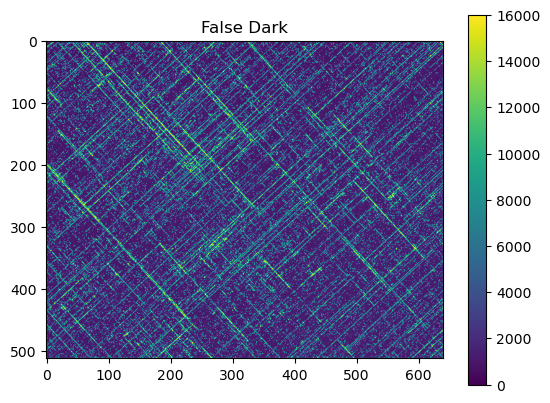

In [6]:
# take a dark with bad pixel as false
sdk.FliCredTwo.EnableBadPixel(cam.context, False)
False_drk = cam.take_median_image(10)


#plotting 
plt.figure()
plt.imshow(False_drk, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('False Dark')

Text(0.5, 1.0, 'True Dark')

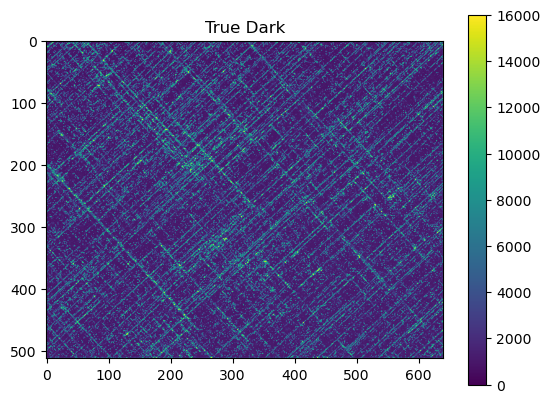

In [7]:
# take a dark with bad pixel as true
sdk.FliCredTwo.EnableBadPixel(cam.context, True)
True_drk = cam.take_median_image(10)

# plotting
plt.imshow(True_drk, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('True Dark')

Work's pretty well!

We want to know exactly what the bad pixel correction is doing here; Fli has a method that returns what mode of bad pixel correction we're using

Time to start thinking about a metric for measuring how well our bad pixel correction works...standard deviation of total population? RMS deviation from a sample of known good pixels?

In [ ]:
sdk.FliCredTwo.

(True, True)